!!!배경 마스킹 필요!!!

In [1]:
from image_preprocessing import *

#### ORB, BF-Hamming

matches:1/29, min:45.00, max:97.00, thresh:55.40


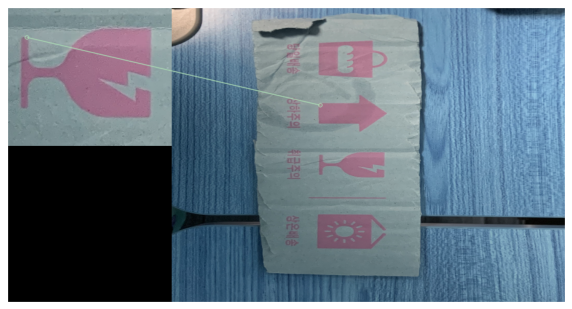

In [14]:
img1 =cv2.imread('/Users/monica_air/Documents/Sign recognition/opencv/SURF/data/fragile_SURF.png', cv2.COLOR_BGR2RGB)

img2 =cv2.imread("/Users/monica_air/Documents/Sign recognition/test dataset/logistic_sign_test (2).jpg", cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, dsize=(640, 480), interpolation=cv2.INTER_AREA)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#ORB detector
detector = cv2.ORB_create()

#keypoints, descriptor
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)

# BF-Hamming으로 매칭 ---②
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# 매칭 결과를 거리기준 오름차순으로 정렬 ---③
matches = sorted(matches, key=lambda x:x.distance)

# 최소 거리 값과 최대 거리 값 확보 ---④
min_dist, max_dist = matches[0].distance, matches[-1].distance

# 최소 거리의 15% 지점을 임계점으로 설정 ---⑤
ratio = 0.2
good_thresh = (max_dist - min_dist) * ratio + min_dist

# 임계점 보다 작은 매칭점만 좋은 매칭점으로 분류 ---⑥
good_matches = [m for m in matches if m.distance < good_thresh]
print('matches:%d/%d, min:%.2f, max:%.2f, thresh:%.2f' \
        %(len(good_matches),len(matches), min_dist, max_dist, good_thresh))

# 좋은 매칭점만 그리기 ---⑦
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

show(res)

#### knnMatch()

matches:0/30


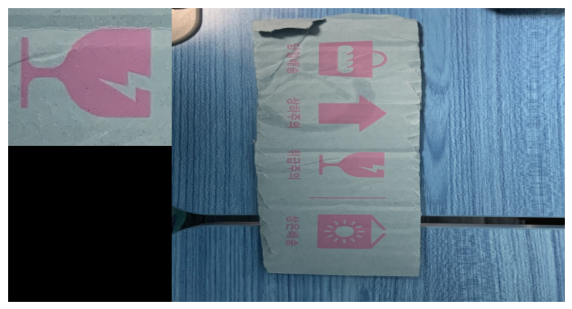

In [5]:
img1 =cv2.imread('/Users/monica_air/Documents/Sign recognition/opencv/SURF/data/fragile_SURF.png', cv2.COLOR_BGR2RGB)
img2 =cv2.imread("/Users/monica_air/Documents/Sign recognition/test dataset/logistic_sign_test (2).jpg", cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, dsize=(640, 480), interpolation=cv2.INTER_AREA)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB로 서술자 추출 ---①
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
# BF-Hamming 생성 ---②
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
# knnMatch, k=2 ---③
matches = matcher.knnMatch(desc1, desc2, 2)

# 첫번재 이웃의 거리가 두 번째 이웃 거리의 75% 이내인 것만 추출---⑤
ratio = 0.75
good_matches = [first for first,second in matches \
                    if first.distance < second.distance * ratio]
print('matches:%d/%d' %(len(good_matches),len(matches)))

# 좋은 매칭만 그리기
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 결과 출력                    
show(res)

#### PROSAC

In [6]:
img1 =cv2.imread('/Users/monica_air/Documents/Sign recognition/opencv/SURF/data/fragile_SURF.png', cv2.COLOR_BGR2RGB)
img2 =cv2.imread("/Users/monica_air/Documents/Sign recognition/test dataset/logistic_sign_test (2).jpg", cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, dsize=(640, 480), interpolation=cv2.INTER_AREA)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB, BF-Hamming 로 knnMatch  ---①
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING2)
matches = matcher.knnMatch(desc1, desc2, 2)

# 이웃 거리의 75%로 좋은 매칭점 추출---②
ratio = 0.75
good_matches = [first for first,second in matches \
                    if first.distance < second.distance * ratio]
print('good matches:%d/%d' %(len(good_matches),len(matches)))

# 좋은 매칭점의 queryIdx로 원본 영상의 좌표 구하기 ---③
src_pts = np.float32([ kp1[m.queryIdx].pt for m in good_matches ])
# 좋은 매칭점의 trainIdx로 대상 영상의 좌표 구하기 ---④
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good_matches ])
# 원근 변환 행렬 구하기 ---⑤
mtrx, mask = cv2.findHomography(src_pts, dst_pts)
# 원본 영상 크기로 변환 영역 좌표 생성 ---⑥
h,w, = img1.shape[:2]
pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])
# 원본 영상 좌표를 원근 변환  ---⑦
dst = cv2.perspectiveTransform(pts,mtrx)
# 변환 좌표 영역을 대상 영상에 그리기 ---⑧
img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

# 좋은 매칭 그려서 출력 ---⑨
res = cv2.drawMatches(img1, kp1, img2, kp2, good_matches, None, \
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

show(res)

good matches:0/30


error: OpenCV(3.4.2) /Users/travis/build/skvark/opencv-python/opencv/modules/calib3d/src/fundam.cpp:372: error: (-5:Bad argument) The input arrays should be 2D or 3D point sets in function 'findHomography'


#### RANSAC 원근 변환 근사 계산

accuracy: 6/29(0.21%)


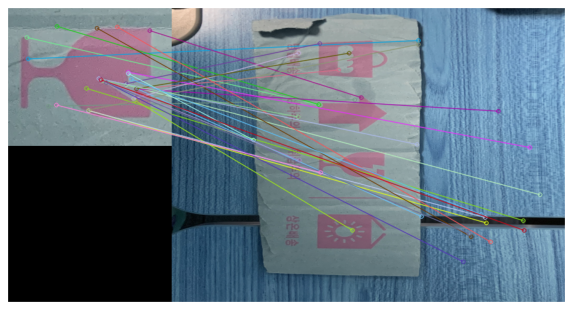

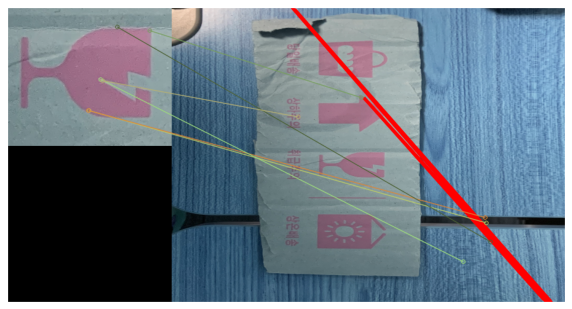

In [9]:
img1 =cv2.imread('/Users/monica_air/Documents/Sign recognition/opencv/SURF/data/fragile_SURF.png', cv2.COLOR_BGR2RGB)
img2 =cv2.imread("/Users/monica_air/Documents/Sign recognition/test dataset/logistic_sign_test (2).jpg", cv2.COLOR_BGR2RGB)
img2 = cv2.resize(img2, dsize=(640, 480), interpolation=cv2.INTER_AREA)

gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# ORB, BF-Hamming 로 knnMatch  ---①
detector = cv2.ORB_create()
kp1, desc1 = detector.detectAndCompute(gray1, None)
kp2, desc2 = detector.detectAndCompute(gray2, None)
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(desc1, desc2)

# 매칭 결과를 거리기준 오름차순으로 정렬 ---③
matches = sorted(matches, key=lambda x:x.distance)
# 모든 매칭점 그리기 ---④
res1 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)

# 매칭점으로 원근 변환 및 영역 표시 ---⑤
src_pts = np.float32([ kp1[m.queryIdx].pt for m in matches ])
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in matches ])
# RANSAC으로 변환 행렬 근사 계산 ---⑥
mtrx, mask = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
h,w = img1.shape[:2]
pts = np.float32([ [[0,0]],[[0,h-1]],[[w-1,h-1]],[[w-1,0]] ])
dst = cv2.perspectiveTransform(pts,mtrx)
img2 = cv2.polylines(img2,[np.int32(dst)],True,255,3, cv2.LINE_AA)

# 정상치 매칭만 그리기 ---⑦
matchesMask = mask.ravel().tolist()
res2 = cv2.drawMatches(img1, kp1, img2, kp2, matches, None, \
                    matchesMask = matchesMask,
                    flags=cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS)
# 모든 매칭점과 정상치 비율 ---⑧
accuracy=float(mask.sum()) / mask.size
print("accuracy: %d/%d(%.2f%%)"% (mask.sum(), mask.size, accuracy))


show(res1)
show(res2)